### Face Mask Detector

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")

You are using TensorFlow version 2.2.0
You have a GPU enabled.


In [0]:
import os
import cv2
import matplotlib.pyplot as plt
import random
from os import listdir
from os.path import isfile, join
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset_path_new = "/content/drive/My Drive/datasets/dataset"

In [0]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "valid")

##Modelo

In [0]:
img_shape = (128,128,3)

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights = "imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [0]:
base_model.output

<tf.Tensor 'out_relu/Identity:0' shape=(None, 4, 4, 1280) dtype=float32>

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [0]:
prediction_layer = tf.keras.layers.Dense(units = 3, activation = "softmax")(global_average_layer)

In [0]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy", 
              metrics = ["accuracy"])

###Data Generators

In [0]:
image_size = 128
batch_size = 32

In [0]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [0]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(image_size,image_size), batch_size=batch_size, class_mode="categorical")
validation_generator = data_gen_train.flow_from_directory(validation_dir, target_size=(image_size,image_size), batch_size=batch_size, class_mode="categorical")

Found 3132 images belonging to 3 classes.
Found 782 images belonging to 3 classes.


###Treinando Modelo

In [0]:
import numpy as np

In [0]:
epochs = 10
batch_size=128
steps_per_epoch = np.ceil(train_generator.n / batch_size)
validation_steps = np.ceil(validation_generator.n / batch_size)

In [0]:
print(steps_per_epoch)
print(validation_steps)

25.0
7.0


In [0]:
history = model.fit(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)

Epoch 1/10
25/25 [==============================] - 911s 36s/step - loss: 0.5258 - accuracy: 0.8125 - val_loss: 0.4679 - val_accuracy: 0.8214
Epoch 2/10
25/25 [==============================] - 904s 36s/step - loss: 0.4253 - accuracy: 0.8275 - val_loss: 0.3521 - val_accuracy: 0.8705
Epoch 3/10
25/25 [==============================] - 936s 37s/step - loss: 0.3603 - accuracy: 0.8863 - val_loss: 0.3318 - val_accuracy: 0.8438
Epoch 4/10
25/25 [==============================] - 228s 9s/step - loss: 0.3282 - accuracy: 0.8857 - val_loss: 0.4142 - val_accuracy: 0.8544
Epoch 5/10
25/25 [==============================] - 2s 76ms/step - loss: 0.2994 - accuracy: 0.8988 - val_loss: 0.2903 - val_accuracy: 0.8929
Epoch 6/10
25/25 [==============================] - 2s 77ms/step - loss: 0.2836 - accuracy: 0.9000 - val_loss: 0.3153 - val_accuracy: 0.8616
Epoch 7/10
25/25 [==============================] - 2s 77ms/step - loss: 0.2965 - accuracy: 0.8913 - val_loss: 0.2987 - val_accuracy: 0.8689
Epoch 8/10

###Avaliando Modelo

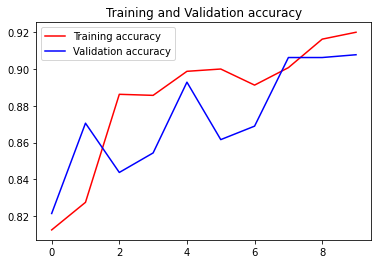

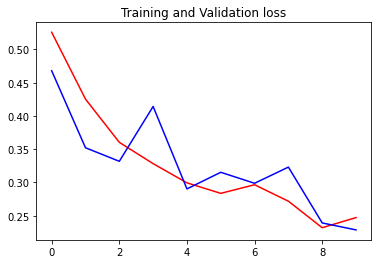

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot  ( epochs,     loss, 'r', label='Training Loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation Loss')
plt.title ('Training and Validation loss')

plt.show()

###Salvando Modelo

In [0]:
model.save('medical_masks.h5') 

json_config = model.to_json()

In [0]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/medical_masks')  # new_model = tf.keras.models.load_model('saved_model/medical_masks')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/medical_masks/assets
